In [13]:
using Plots
using LaTeXStrings
using DifferentialEquations
using PrettyTables

### 1. Improved Euler Method
#### 1.1 Numerical Scheme
We first introduce an second order method, named improved Euler method:
$$
{u}_{i+1} = u_i +  hf\left(t_i+\tfrac{1}{2}h,u_i+\tfrac{1}{2}h f(t_i,u_i)\right).
$$
whose local truncation error is $\tau_{i+1} = \mathcal{O} (n^2)$, the derive detail is as follows:
We first denote the exact solution of $u$ at $t_i, t_{i+1}=t_i+h$ by $\hat{u}_{i+1}, \hat{u}_{i}$, then by the Taylor expansion, we can get that
$$
f\left(t_i+\tfrac{1}{2}h,\hat{u}_i+\tfrac{1}{2}h f(t_i,\hat{u}_i)\right) = f(t_i, \hat{u}_i) + \frac{1}{2} hf_t(t_i, \hat{u}_i) + \frac{1}{2}hf_u(t_i, \hat{u}_i) \cdot f(t_i, \hat{u}_i) + O(n^2)
$$
and
$$
\hat{u}_{i+1} = \hat{u}_{i} + h \hat{u}_{i}^{\prime} + \frac{h^2}{2} \hat{u}_{i}^{''} + O(h^3),
$$
where the  $\hat{u}_{i}^{''}$ can be computed as 
$$
\begin{align}
\hat{u}_{i}^{''} &= f^{\prime} (t_i, \hat{u}_i) \\
&= \frac{d f}{dt}(t_i, \hat{u}_i) \\
&= f_t(t_i, \hat{u}_i) + f_u(t_i, \hat{u}_i) \cdot \hat{u}_{i}^{\prime} \\
&= f_t(t_i, \hat{u}_i) + f_u(t_i, \hat{u}_i) \cdot f(t_i, \hat{u}_i). 
\end{align}
$$
Then
$$
\begin{align}
\hat{u}_{i+1} & = \hat{u}_{i} + h \hat{u}_{i}^{\prime} + \frac{h^2}{2} \textcolor{red}{\hat{u}_{i}^{''}} + O(h^3)\\
& = \hat{u}_{i} + h \hat{u}_{i}^{\prime} + \frac{h^2}{2} \left(\textcolor{red}{f_t(t_i, \hat{u}_i) + f_u(t_i, \hat{u}_i) \cdot f(t_i, \hat{u}_i)}\right) + O(h^3)\\
&= \hat{u}_{i} + hf(t_i, \hat{u}_i)  + \frac{h^2}{2} \left(\textcolor{red}{f_t(t_i, \hat{u}_i) + f_u(t_i, \hat{u}_i) \cdot f(t_i, \hat{u}_i)}\right) + O(h^3)
\end{align}
$$
Futhermore, the local truncation error $\tau_{i+1}$ can be computed as
$$
\begin{align}
\tau_{i+1} & = \frac{\hat{u}_{i+1} - \hat{u}_{i}}{h} -  f\left(t_i+\tfrac{1}{2}h,\hat{u}_i+\tfrac{1}{2}h f(t_i,\hat{u}_i)\right) \\
& = O(n^2).
\end{align}
$$

#### 1.2 Implementation

In [ ]:
# Implementation of Improved Euler
# Copied from https://tobydriscoll.net/fnc-julia/ivp/rk.html

"""
    ie2(ivp, n)

Apply the Improved Euler method to solve the given IVP using `n`
time steps. Return a vector of times and a vector of solution
values.
"""
function ie2(ivp, n)
    # Time discretization.
    a, b = ivp.tspan
    h = (b-a)/n
    t = [ a + i*h for i in 0:n ]
    
    # Initialize output.
    u = fill(float(ivp.u0), n+1)
    
    # Time stepping.
    for i in 1:n
        uhalf = u[i] + h/2 * ivp.f(u[i], ivp.p, t[i]);
        u[i+1] = u[i] + h*ivp.f(uhalf, ivp.p, t[i]+h/2);
    end
    return t, u
end

### 2. The 4th order Runge-Kutta method
#### 2.1 Numerical Scheme
The numerical scheme of 4th order Runge-Kutta is as follows
$$
\begin{split}  \begin{split}
    k_1 &= hf(t_i,u_i), \\
    k_2 &= hf(t_i+h/2,u_i+k_1/2),\\
    k_3 &= hf(t_i+h/2,u_i+k_2/2),\\
    k_4 &= hf(t_i+h,u_i+k_3),\\
    u_{i+1} &= u_i + \frac{1}{6} k_1 + \frac{1}{3} k_2 + \frac{1}{3} k_3 + \frac{1}{6} k_4.
  \end{split}\end{split}
$$
#### 2.2 Implementation

In [15]:
# Implementation of the 4th order Runge-Kutta
# Copied from https://tobydriscoll.net/fnc-julia/ivp/rk.html
"""
    rk4(ivp,n)

Apply the common Runge-Kutta 4th order method to solve the given 
IVP using `n` time steps. Returns a vector of times and a vector of
solution values.
"""
function rk4(ivp, n)
    # Time discretization
    a, b = ivp.tspan
    h = (b-a)/n
    t = [a + i*h for i in 0:n]

    # Initialize output
    u = fill(float(ivp.u0), n+1)

    # Time stepping
    # Time stepping.
    for i in 1:n
        k₁ = h*ivp.f( u[i],      ivp.p, t[i]     )
        k₂ = h*ivp.f( u[i]+k₁/2, ivp.p, t[i]+h/2 )
        k₃ = h*ivp.f( u[i]+k₂/2, ivp.p, t[i]+h/2 )
        k₄ = h*ivp.f( u[i]+k₃,   ivp.p, t[i]+h   )
        u[i+1] = u[i] + (k₁ + 2(k₂+k₃) + k₄)/6
    end
    return t,u
end

rk4

#### 2.3 Example
##### 2.3.1 Example 1
We consider the IVP $u'=\sin[(u+t)^2]$ over $0\leq t \leq 4$, with $u(0) = -1$.

In [16]:
f = (u, p, t) -> sin((t+u)^2)
tspan = (0.0, 4.0)
u0 = -1.0

ivp = ODEProblem(f, u0, tspan)

ODEProblem with uType Float64 and tType Float64. In-place: false
timespan: (0.0, 4.0)
u0: -1.0

In [17]:
# We use a DifferentialEquations solver to construct an accurate approximation to the exact solution.
u_ref = solve(ivp,Tsit5(),reltol=1e-14,abstol=1e-14);


In [18]:
n = [ round(Int,2*10^k) for k in 0:0.5:3 ]
err_IE2,err_RK4 = [],[]
for n in n
    t,u = ie2(ivp,n)
    push!( err_IE2, maximum( @.abs(u_ref(t)-u) ) )
    t,u = rk4(ivp,n)
    push!( err_RK4, maximum( @.abs(u_ref(t)-u) ) )
end

pretty_table([n err_IE2 err_RK4]; header=["n","IE2 error","RK4 error"])

┌──────┬─────────────┬─────────────┐
│    n │   IE2 error │   RK4 error │
├──────┼─────────────┼─────────────┤
│    2 │     1.76903 │    0.820651 │
│    6 │    0.512684 │    0.791925 │
│   20 │   0.0240594 │  0.00081269 │
│   63 │  0.00225327 │  8.06216e-6 │
│  200 │ 0.000222419 │  7.60655e-8 │
│  632 │  2.22528e-5 │ 7.51299e-10 │
│ 2000 │  2.22177e-6 │ 7.45071e-12 │
└──────┴─────────────┴─────────────┘


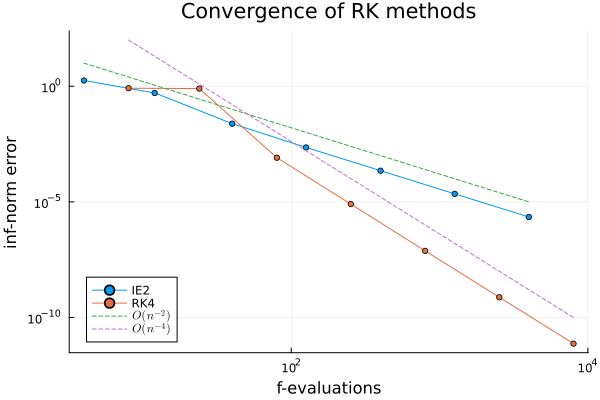

In [19]:
plot([2n 4n],[err_IE2 err_RK4],m=3,label=["IE2" "RK4"],
    xaxis=(:log10,"f-evaluations"),yaxis=(:log10,"inf-norm error"),
    title="Convergence of RK methods",leg=:bottomleft)

plot!(2n,1e-5*(n/n[end]).^(-2),l=:dash,label=L"O(n^{-2})")
plot!(4n,1e-10*(n/n[end]).^(-4),l=:dash,label=L"O(n^{-4})")